 Hari Kosuru, hk8663,
 Atreya Misra, am73676

In [114]:
import numpy as np
import pandas as pd

import random
from math import sqrt

import matplotlib.pyplot as plt

Problem 1: K-Means

In [115]:
# Generate a random initialization
numPoints = 1000
numClusters = 3
min = 0
max = 1
# generatedPoints = []

random.seed(40)
threshHold = .1


def pythag(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)


# for i in range(0, numPoints):
#     generatedPoints.append([random.uniform(min, max), random.uniform(min, max)])

generatedPoints = np.random.rand(numPoints, 2)
copyOfPoints = generatedPoints

# Generate the initial k-means(randomly)
means = []
centroids = []

clusters = [[] for _ in range(numClusters)]


def kMeanLoop(means):
    converged = False
    while not converged:
        for i in range(0, len(copyOfPoints)):
            dists = []
            for j in range(0, numClusters):
                dists.append(pythag(generatedPoints[i], means[j]))
                # print dists
            minIndex = np.argmin(dists)
            (clusters[minIndex]).append(copyOfPoints[i])

        # calculate centroids
        centroids[:] = []
        for i in range(0, numClusters):
            thisCluster = clusters[i]
            centroids.append([np.mean([x[0] for x in thisCluster]), np.mean([x[1] for x in thisCluster])])

        diff = 0.0
        converged = True
        for i in range(0, numClusters):
            diff = pythag(centroids[i], means[i])
            # print 'Difference between mean and centroid of ' + str(i) + ': ' + str(diff)
            if diff > threshHold:
                converged = False

        if not converged:
            means = centroids


def kMeans(generatedPoints, k):
    for i in range(0, numClusters):
        potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        while potentialMean in means:
            potentialMean = [random.uniform(min, max), random.uniform(min, max)]
        means.append(potentialMean)

    kMeanLoop(means)


def kMeanspp(generatedPoints, k):
    means.append([random.uniform(min, max), random.uniform(min, max)])
    for i in range(1, k):
        dists = []
        for point in generatedPoints:
            allDists = []
            for centroid in means:
                allDists.append(pythag(point, centroid) ** 2)
            dists.append(allDists[np.argmin(allDists)])

        p = []
        for j in dists:
            p.append(j / np.sum(np.array(dists)))

        means.append(generatedPoints[np.random.choice(numPoints, p=p)])

    kMeanLoop(means)


# x_val = [x[0] for x in generatedPoints]
# y_val = [y[1] for y in generatedPoints]
#
# plt.scatter(x_val, y_val, label='Generated Points')
def display():
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'y']
    for i in range(0, numClusters):
        x_val = [x[0] for x in clusters[i]]
        y_val = [y[1] for y in clusters[i]]

        plt.scatter(x_val, y_val, color=colors[i], label='Cluster ' + str(i))

    # x_val = [x[0] for x in means]
    # y_val = [y[1] for y in means]
    #
    # plt.scatter(x_val, y_val, marker='x', label='Initial Means')

    x_val = [x[0] for x in centroids]
    y_val = [y[1] for y in centroids]

    plt.scatter(x_val, y_val, marker='x', color='k', s=50, label='Final Means')
    plt.title('Generated Points and Corresponding Clusters')
    plt.legend()
    plt.show()

# print 'Generated Points(Randomized):\n', np.asarray(generatedPoints)
# print '\nGenerated Means(Randomized):\n', means
# print '\nCalculated Clusters:\n', clusters
# print '\nCalculated Centroids:\n', centroids

K Means:

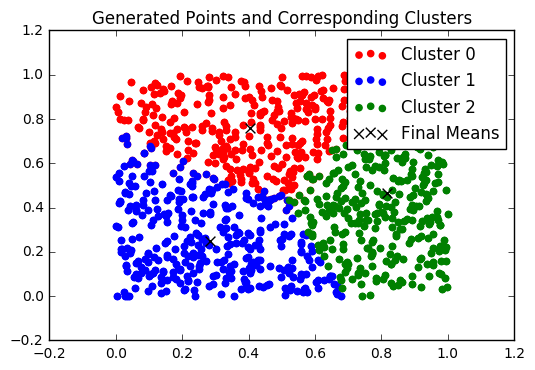

In [116]:
kMeans(generatedPoints, numClusters)
display()

K Means++:

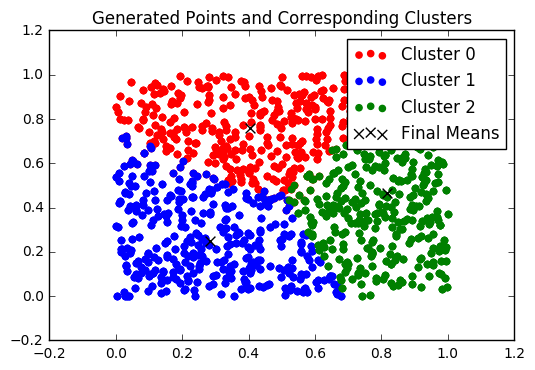

In [117]:
kMeanspp(generatedPoints, numClusters)
display()